# Prueba Técnica - Protección

### Juan Esteban Zapata

In [1]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Análisis Exploratorio de Datos

In [2]:
# Carga del dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Breve descripción del datset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Se observa que el dataset tiene 21613 entradas e igual número de entradas no nulas por columna. Además son todas variables numéricas excepto `id`.


El objetivo es ajustar un modelo de Machine-Learning y realizar predicciones sobre la variable `price`. Veamos algunos estadísticos importantes de esta:

In [4]:
house_data.price.describe().to_frame()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


La distribución de la variable `price`:

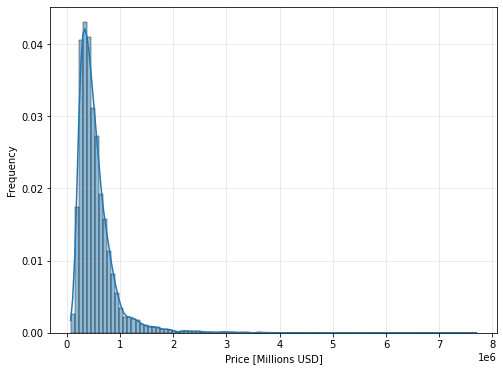

In [5]:
ax = plt.figure(figsize=(8,6)).gca()
sns.histplot(data=house_data, x='price', stat='frequency',
                bins=100, kde=True, ax=ax)
ax.set(xlabel='Price [Millions USD]')
ax.grid(alpha=0.3)
plt.show()

Veamos cómo se relaciona el área de la casa `sqft_living` y el área del lote `sqft_lot` con el precio del inmueble `price`:

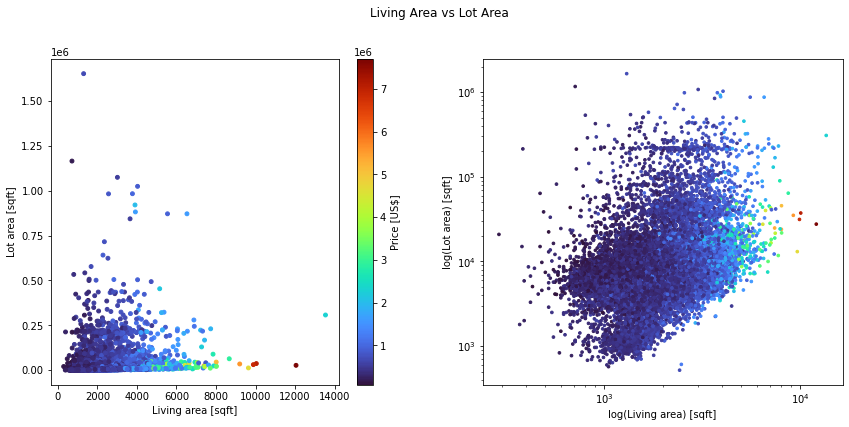

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
plt.subplots_adjust(right=1.5)
points = ax[0].scatter(data=house_data, x='sqft_living', s=15, y='sqft_lot', c='price', cmap='turbo')

ax[1].scatter(data=house_data, x='sqft_living', s=7, y='sqft_lot', c='price', cmap='turbo')

ax[0].set(ylabel='Lot area [sqft]', xlabel='Living area [sqft]')

ax[1].set(xscale='log', yscale='log', ylabel='log(Lot area) [sqft]', 
          xlabel='log(Living area) [sqft]')

fig.suptitle(x=0.8, y=1, t='Living Area vs Lot Area', )

plt.colorbar(ScalarMappable(cmap=points.get_cmap(), norm=points.norm), ax=ax[0], label='Price [US$]')
plt.show()

Se observa que hay una alta dispersión en los datos sobre las áreas, especialmente en el área del lote, que en el diagrama logarítmico cubre hasta 4 órdenes de magnitud. Esto indica la presencia de outliers en los datos que será necesario tratar.

También se relacionó el diagrama de dispersión de las áreas con el precio de la vivienda. Se observa que en la dirección horizontal (sobre el área de la casa) el gradiente de precios es más alto que en la dirección vertical, lo que puede indicar que la variable `sqft_living` es más relevante para el precio.


En el dataset hay varios features sobre áreas, veamos cuáles son:

In [7]:
house_data.filter(like='sqft', axis=1)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1340,5650
1,2570,7242,2170,400,1690,7639
2,770,10000,770,0,2720,8062
3,1960,5000,1050,910,1360,5000
4,1680,8080,1680,0,1800,7503
...,...,...,...,...,...,...
21608,1530,1131,1530,0,1530,1509
21609,2310,5813,2310,0,1830,7200
21610,1020,1350,1020,0,1020,2007
21611,1600,2388,1600,0,1410,1287


Puede notarse la presencia de ceros en la columna `sqft_basement` correspondiente al área del sótano (evidentemente, área cero indica que no tiene sótano). 
Al tratarse de variables similares podría haber multicolinealidad entre ellas, lo que sería problemático en el momento de entrenar un modelo predictivo. Veamos cómo se correlacionan estos features:

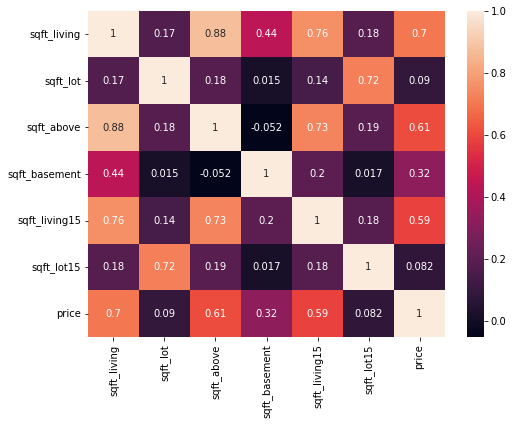

In [8]:
ax = plt.figure(figsize=(8,6)).gca()
sns.heatmap(house_data.filter(like='sqft', axis=1).join(house_data.price).corr(), annot=True, ax=ax)
plt.show()

Se evidencia una muy alta correlación entre las variables del área de la casa `sqft_living` con las variables `sqft_above` y `sqft_living15`. De la misma manera entre las variables `sqft_lot` y `sqft_lot15`. Probablemente se traten entonces de variables redundantes que pueden ser dañinas para el ajuste del modelo.

También se evidencia que las variables más correlacionadas con el precio del inmueble son `sqft_living` y  `sqft_above`.
Corroboremos esta hipótesis con un pairplot:

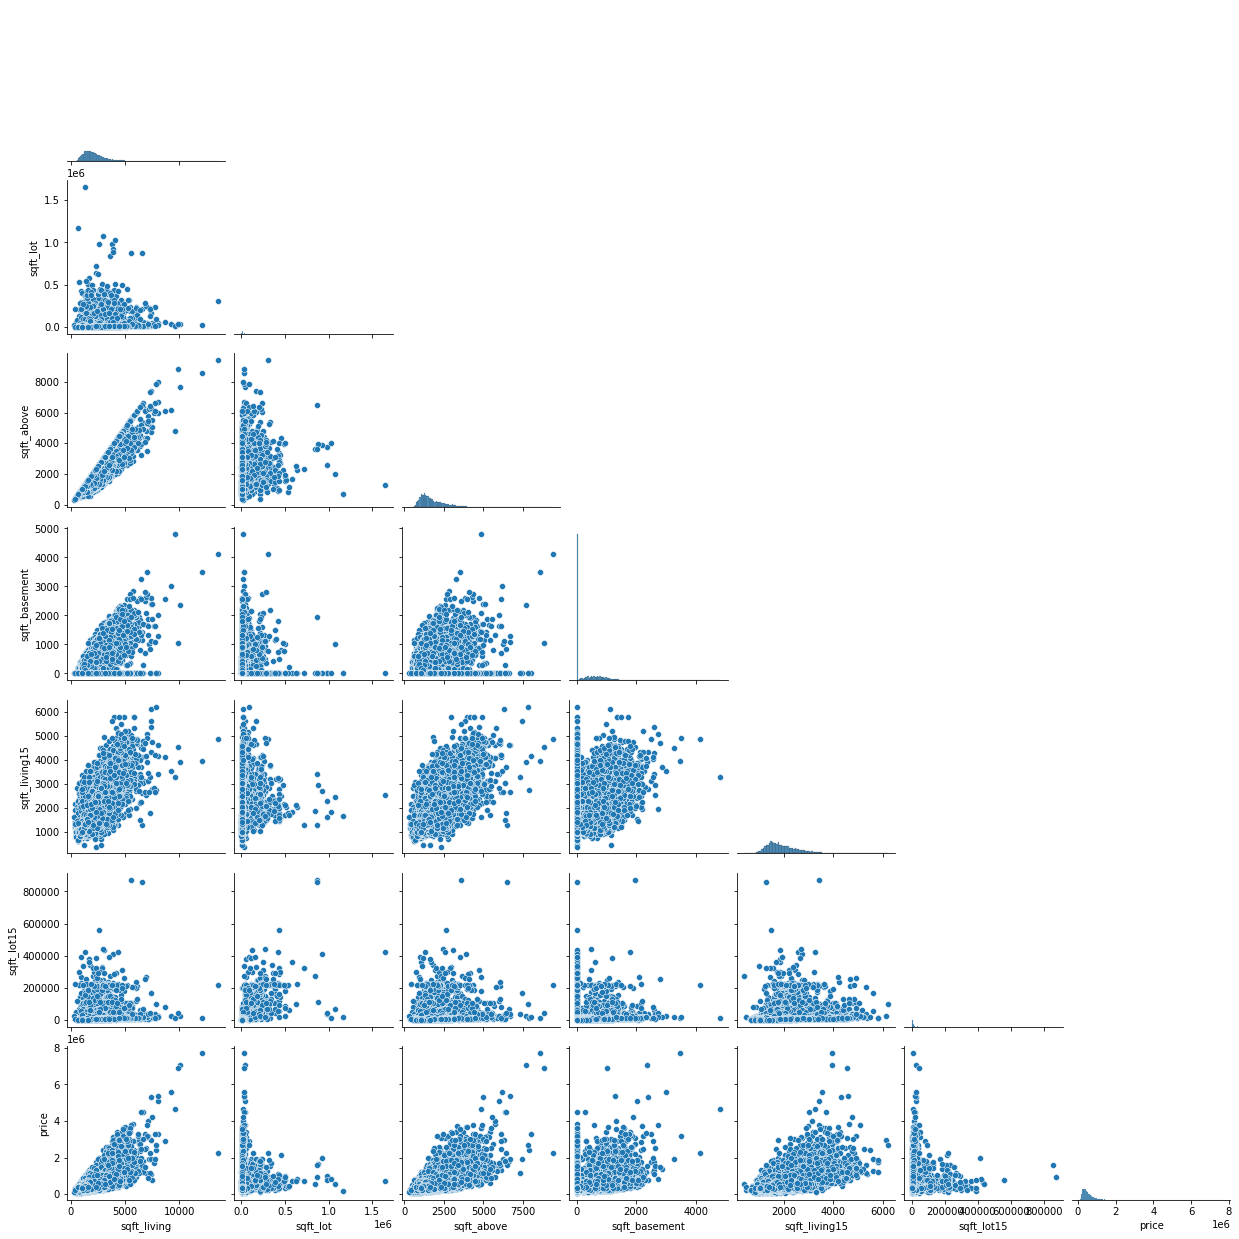

In [9]:
sns.pairplot(house_data.filter(like='sqft', axis=1).join(house_data.price), corner=True)

Se evidencia que `sqft_living` parece estar relacionada linealmente con `sqft_living15`, `sqft_above` y `sqft_basement`. Estas variables son consideradas entonces multicolineales.

Observemos ahora cómo se correlaciona el precio con algunas propiedades estructurales de los inmuebles:

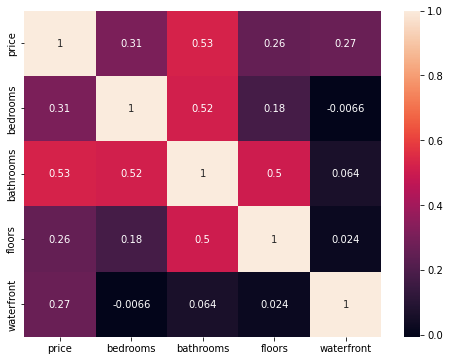

In [10]:
ax = plt.figure(figsize=(8,6)).gca()
sns.heatmap(house_data[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront']].corr(),annot=True, ax=ax)
plt.show()

El target `price` parece tener una correlación positiva con el número de baños `bathrooms`, el número de habitaciones `bedrooms`, el número de pisos `floors` y si el inmueble tiene vista al mar `waterfront`.

Por último, veamos cómo se relaciona con las variables restantes:

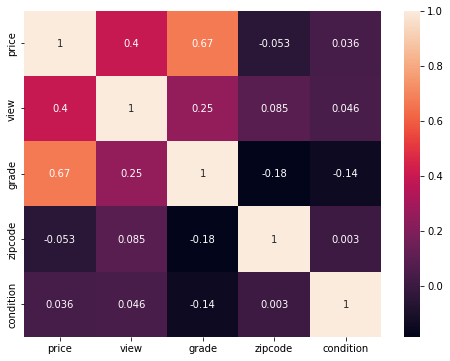

In [11]:
ax = plt.figure(figsize=(8,6)).gca()
sns.heatmap(house_data[['price', 'view', 'grade', 'zipcode', 'condition']].corr(),
            annot=True, ax=ax)
plt.show()

Se observa una alta correlación con la variable `grade`.

## Preprocesamiento

In [12]:
# Rutinas de preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_squared_error, r2_score

# Regresores
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

Para ajustar el modelo se usan las variables mostradas a continuación, que fueron las que más relación parecieron mostrar con `price`:

In [13]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'waterfront', 'view', 'grade']

data = house_data[num_cols]

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade
0,221900,3,1.00,1180,5650,1.0,0,0,7
1,538000,3,2.25,2570,7242,2.0,0,0,7
2,180000,2,1.00,770,10000,1.0,0,0,6
3,604000,4,3.00,1960,5000,1.0,0,0,7
4,510000,3,2.00,1680,8080,1.0,0,0,8


Debido a que las escalas de las variables son muy dispares, es conveniente estandarizar el dataset. Se deja por fuera las variables `grade` y `waterfront` que son variables discretas, una binaria (`waterfront`) y la otra ya escalada al 10 (`grade`). Para eliminar los outliers se escoge como límite aquellos datos cuyo z_score sea mayor que 3.

In [14]:
scaler = StandardScaler()
st_data = pd.DataFrame(np.abs(scaler.fit_transform(data.drop(['grade', 'waterfront'], axis=1))), 
                       columns=data.drop(['grade', 'waterfront'], axis=1).columns)
 
outlier_lim = 3

idxs = np.where(st_data.mask(st_data > outlier_lim, other=np.nan).isna().any(axis=1))[0]

data.drop(idxs, axis=0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade
0,221900,3,1.00,1180,5650,1.0,0,0,7
1,538000,3,2.25,2570,7242,2.0,0,0,7
2,180000,2,1.00,770,10000,1.0,0,0,6
3,604000,4,3.00,1960,5000,1.0,0,0,7
4,510000,3,2.00,1680,8080,1.0,0,0,8
...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,8
21609,400000,4,2.50,2310,5813,2.0,0,0,8
21610,402101,2,0.75,1020,1350,2.0,0,0,7
21611,400000,3,2.50,1600,2388,2.0,0,0,8


Veamos nuevamente la matriz de correlación de las variables consideradas:

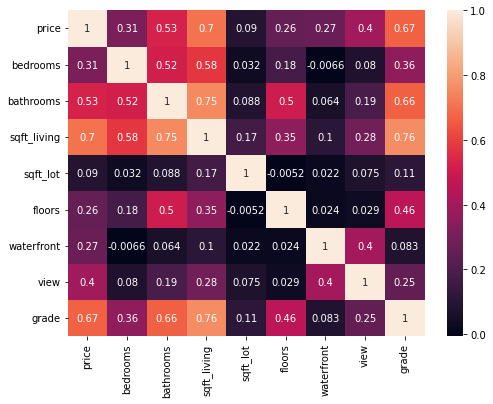

In [15]:
ax = plt.figure(figsize=(8,6)).gca()
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

La variable del área del lote `sqft_lot` presenta una correlación baja con el precio, así que es descartada para ajustar el modelo.

In [16]:
X = data.drop(['price', 'sqft_lot'], axis=1)
y = data['price']

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

Probemos un modelo predictivo sencillo usando un Regresor Lineal Simple, y veamos el diagrama de residuales:

MSE: 0.3570299776644201


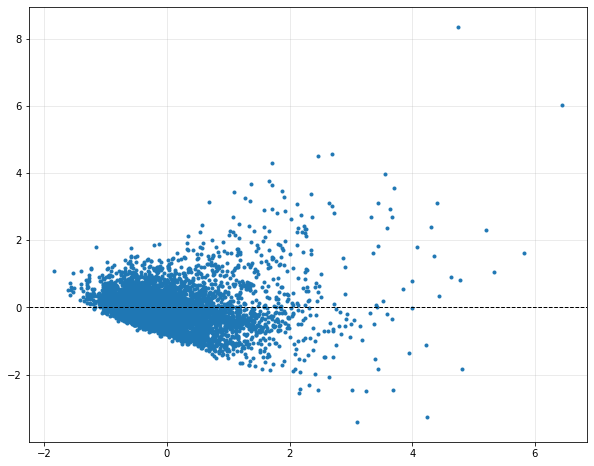

In [17]:
lr = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test).reshape(-1,1)

print(f'MSE: {mean_squared_error(y_pred, y_test)}')

ax = plt.figure(figsize=(10,8)).gca()
ax.plot(y_pred, y_test-y_pred, '.')
ax.axhline(0, color='k', ls='--',linewidth=1)
ax.grid(alpha=0.3)
plt.show()

El comportamiento del diagrama de residuales parece ser simétrico con respecto a la línea horizontal, pero presenta mucha dispersión vertical lo que indica que el modelo no ajustó muy bien los datos.

## Testeo de modelos

Probemos ahora con diferentes regresores. Para hacer una buena validación es necesario usar validación cruzada. Los regresores escogidos se presentan en el dict `regressors`.

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [19]:
regressors = {'Linear':LinearRegression(),
    'RandomForest': RandomForestRegressor(), 
    'GradBoost':GradientBoostingRegressor(),
    'Huber':HuberRegressor()}

for name, reg in regressors.items():
    scores = cross_validate(reg, X, y, cv=3, scoring=['r2', 'neg_mean_squared_error'])
    print(f'{name}: r2 =', scores['test_r2'].mean(), '. MSE:', -1*scores['test_neg_mean_squared_error'].mean())


Linear: r2 = 0.5915677101771947 . MSE: 0.40792516973796733
RandomForest: r2 = 0.5961843664841482 . MSE: 0.40345745304203406
GradBoost: r2 = 0.6535480181714343 . MSE: 0.3459494269290569
Huber: r2 = 0.5653154126987391 . MSE: 0.43423746471936525


Las métricas escogidas fueron el error cuadrático medio MSE y el coeficiente de determinación $R^2$. El regresor que mejores resultados arrojó fue el `Gradient Boost Regressor`. Ahora se realiza una optimización de parámetros sencilla con ayuda del algoritmo de `GridSearchCV` y una validación cruzada de 3. Como métrica para evaluar el modelo se escogió el error cuadrático medio. EL mejor modelo es guardado en la variable `best_estimator`.

In [20]:
params = {'max_depth':[3,6],
'min_samples_split':[2,5], 
'n_estimators':[100, 120]}

gb = GradientBoostingRegressor()

gsparam = GridSearchCV(gb, param_grid=params, cv=3, scoring='neg_mean_squared_error').fit(X, y)

best_estimator = gsparam.best_estimator_

print(best_estimator.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Probemos el desempeño del mejor estimador encontrado haciendo predicciones sobre un subconjunto de prueba:

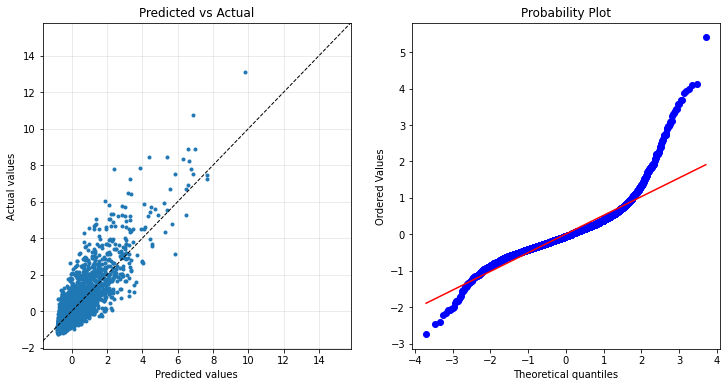

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

y_pred = best_estimator.predict(X_test)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
plt.subplots_adjust(right=1.3)
ax[0].plot(y_pred, y_test.ravel(), '.')
ax[0].axline([0,0], [15,15], color='k', ls='--', linewidth=1)
ax[0].grid(alpha=0.3)
ax[0].set(xlabel='Predicted values', ylabel='Actual values', title='Predicted vs Actual')

residuals = y_test.ravel()-y_pred
res = stats.probplot(residuals, plot=ax[1])

Se observa que en el diagrama de valores reales vs predichos, hay simetría respecto a la línea $y=x$, lo que indica que el modelo supo ajustar medianamente bien los datos. En el diagrama QQ de la derecha se evidencia, sin embargo, anomalías en la distribución de los residuales, lo que indica que el modelo es bastante mejorable.

Por último, examinemos la importancia de los features que ayudarán en tomar una decisión respecto a la inversión:

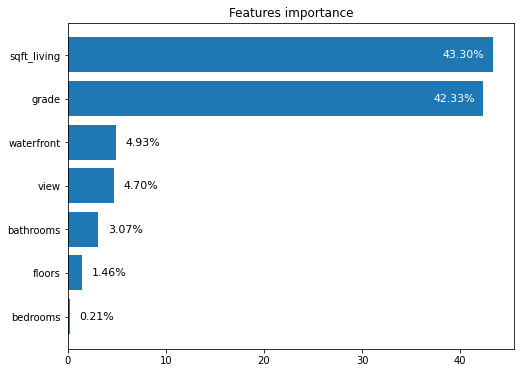

In [22]:
order = np.argsort(best_estimator.feature_importances_)

ax = plt.figure(figsize=(8,6)).gca()
ax.barh(y=data.drop(['price', 'sqft_lot'], axis=1).columns[order], 
        width=best_estimator.feature_importances_[order]*100,
        zorder=2)
ax.set(title='Features importance')

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    color='black'
    space = 10
    if x_value > 40:
        space = -50
        color='white'
    label = '{:,.2f}%'.format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space,0),
        textcoords='offset points',
        va='center',
        color=color,
        fontsize=11
        )

Se observa que los features de más relevancia para el precio son el área de la casa `sqft_living` (como es de esperarse), la calificación `grade` (mejor calificada una casa, más alto va a ser su precio), si tiene vista al mar y el número de baños. Las otras variables son algo menos importantes para el precio del inmueble.

En conclusión, para realizar una buena inversión, los aspectos más relevantes a tener en cuenta son el área de la casa y su ubicación (si tiene vista al mar).